## Assignment 1 - Using Linear Regression to predict the pixels of larger image from a downsampled image

### Reading the input image

In [1]:
import cv2
img = cv2.imread('standard_test_images/peppers_gray.tif', 0)
print(img.shape)

(512, 512)


### Display the input image

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

<Figure size 640x480 with 1 Axes>

### Down sample the image by removing the pixels in alternate rows and columns

In [3]:
print(img)

[[115 115 110 ... 174 171 169]
 [115 115 101 ... 174 169 169]
 [127 115 110 ... 174 174 164]
 ...
 [136 121 111 ... 193 197 205]
 [137 109 111 ... 205 205 193]
 [109 121 108 ... 193 197 197]]


In [4]:
print(img.shape[0], img.shape[1])

512 512


In [5]:
import numpy as np
img = np.array(img)
# all rows and every second column: 
# img_down_sampled = img[:, ::2] 

# all columns and every second row:
# img_down_sampled = img[::2, :]

# combining both of the above commented expressions
# to select all alternate rows and columns
img_down_sampled = img[::2, ::2]
print(img_down_sampled)

[[115 110 110 ... 172 174 171]
 [127 110 110 ... 171 176 174]
 [115  97 101 ... 182 174 176]
 ...
 [128  93 133 ... 180 180 205]
 [136  98 111 ... 207 193 205]
 [137 111  93 ... 197 205 205]]


### Create the feature matrix (X) and the training data matrix (Y) required for linear regression

In [6]:
# excluding the first and last rows and columns, every element is surrounded by 4 corner pixels
# we can write the element as, e = ø1*a + ø2*b + ø3*c + ø4*d, where a, b, c and d are the corner pixels and øi's are 
# the parameters

# remove the first and last rows and colums
single_block = img_down_sampled[1:255, 1:255]
# print(single_block.shape)

rows_X_features = single_block.shape[0] * single_block.shape[1]
# print(rows_X_features)

# 4 neighbours for every cell in the single_block
cols_X_features = 4 

# for diagonal neighbours
X_features_diag = []
# for straight neighbours
X_features_str = []
# print(X_features.shape)
Y_data = []

def get_neighbours_diag(i, j):
    neighbours = [0]*4
    neighbours[0] = img_down_sampled[i - 1][j - 1] # upper left
    neighbours[1] = img_down_sampled[i - 1][j + 1] # upper right 
    neighbours[2] = img_down_sampled[i + 1][j + 1] # bottom right
    neighbours[3] = img_down_sampled[i + 1][j - 1] # bottom left
    return neighbours

def get_neighbours_str(i, j):
    neighbours = [0]*4
    neighbours[0] = img_down_sampled[i - i][j] # up
    neighbours[1] = img_down_sampled[i][j + 1] # right
    neighbours[2] = img_down_sampled[i + 1][j] # down
    neighbours[3] = img_down_sampled[i][j - 1] # left
    return neighbours

for i in range(1, 255):
    for j in range(1, 255):
        X_features_diag.append(get_neighbours_diag(i, j))
#         X_features_diag = np.append(X_features_diag, [get_neighbours_diag(i, j)], axis = 0)
        X_features_str.append(get_neighbours_str(i, j))
#         Y_data = np.append(Y_data, [[img_down_sampled[i][j]]], axis = 0)
        Y_data.append([img_down_sampled[i][j]])

In [7]:
X_features_diag = np.array(X_features_diag, float)
X_features_str = np.array(X_features_str, float)
Y_data = np.array(Y_data, float)
print("FEATURE MATRIX Diagonal Neighbours: ")
print(X_features_diag)
print("\nFEATURE MATRIX Straight Neighbours: ")
print(X_features_str)
print("\nTRAINING DATA: ")
print(Y_data)

FEATURE MATRIX Diagonal Neighbours: 
[[115. 110. 101. 115.]
 [110. 116. 102.  97.]
 [110. 101. 101. 101.]
 ...
 [202. 180. 197. 193.]
 [202. 180. 205. 197.]
 [180. 205. 205. 197.]]

FEATURE MATRIX Straight Neighbours: 
[[110. 110.  97. 127.]
 [110. 110. 101. 110.]
 [116. 102. 102. 110.]
 ...
 [179. 207. 197. 205.]
 [172. 193. 197. 197.]
 [174. 205. 205. 207.]]

TRAINING DATA: 
[[110.]
 [110.]
 [110.]
 ...
 [197.]
 [207.]
 [193.]]


### Apply least square error method to get the paramters 

In [8]:
# Y = X.Ø, by least square error method, we get, ø = [X'X]^(-1).X'.Y
from numpy.linalg import inv
X_transpose = np.transpose(X_features_diag);
para_diag = np.matmul(np.matmul(inv(np.matmul(X_transpose, X_features_diag)), X_transpose), Y_data)
print(para_diag)

X_transpose = np.transpose(X_features_str);
para_str = np.matmul(np.matmul(inv(np.matmul(X_transpose, X_features_str)), X_transpose), Y_data)
print(para_str)

[[0.22072026]
 [0.27965734]
 [0.22205045]
 [0.28066165]]
[[-0.00617148]
 [ 0.38503495]
 [ 0.2213459 ]
 [ 0.40212618]]


### Predict the missing pixels by applying the linear regression model

In [9]:
img_predict = np.array(img)
# make the pixels in alternate rows and columns to be 0 
# Note: While downsampling, we chose starting index to be 0,
# but, while prediction, we have to chose starting index to be 1
# since now we have to first set alternate rows to 0 
# and then set alternate cols to 0,
# we can't do both the things simultaneously
img_predict[1::2, :] = 0
img_predict[:, 1::2] = 0
img_predict = np.array(img_predict, float)
print(img_predict)

[[115.   0. 110. ...   0. 171.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [127.   0. 110. ...   0. 174.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [137.   0. 111. ...   0. 205.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


#### For those cells, which have all 4 diagonals neighbours, predict the missing pixel

In [10]:
def predict_pixel_diag(i, j):
    neighbours = np.array([img_predict[i - 1][j - 1], img_predict[i - 1][j + 1], img_predict[i + 1][j + 1], img_predict[i + 1][j - 1]])
    pixel = np.matmul(neighbours, para_diag)
    return pixel

# print(img_predict[:8, :8])

for i in range(1, 510, 2):
    for j in range(1, 510, 2):
        img_predict[i, j] = predict_pixel_diag(i, j)
        
np.set_printoptions(precision = 3)
print(img_predict[:8, :8])

[[115.      0.    110.      0.    110.      0.    116.      0.   ]
 [  0.    116.215   0.    110.34    0.    112.018   0.    107.371]
 [127.      0.    110.      0.    110.      0.    110.      0.   ]
 [  0.    112.609   0.    104.693   0.    106.038   0.    103.859]
 [115.      0.     97.      0.    101.      0.    102.      0.   ]
 [  0.    109.211   0.    104.954   0.    104.118   0.    104.864]
 [115.      0.    110.      0.    110.      0.    101.      0.   ]
 [  0.    112.847   0.    110.34    0.    104.936   0.    104.606]]


#### For those cells, which now have all 4 straight neighbours, predict the missing pixel

In [11]:
def predict_pixel_str(i, j):
    neighbours = np.array([img_predict[i - 1][j], img_predict[i][j + 1], img_predict[i + 1][j], img_predict[i][j - 1]])
    pixel = np.matmul(neighbours, para_str)
    return pixel

for i in range(2, 510, 2):
    for j in range(1, 510, 2):
        img_predict[i, j] = predict_pixel_str(i, j)
        
for i in range(1, 510, 2):
    for j in range(2, 509, 2):
        img_predict[i, j] = predict_pixel_str(i, j)
        
print(img_predict[:8, :8])

[[115.      0.    110.      0.    110.      0.    116.      0.   ]
 [  0.    116.215 112.887 110.34  111.171 112.018 110.019 107.371]
 [127.    117.632 110.    109.08  110.    109.367 110.    105.834]
 [  0.    112.609 106.385 104.693 104.605 106.038 104.528 103.859]
 [115.    107.071  97.    100.48  101.    102.28  102.    102.476]
 [  0.    109.211 108.077 104.954 106.018 104.118 103.971 104.864]
 [115.    112.903 110.    110.363 110.    105.707 101.    107.786]
 [  0.    112.847 111.533 110.34  108.444 104.936 103.322 104.606]]


#### Predict the missing pixels in the second last row and second last column (those with 3 neighbours)

In [12]:
# Since we only know the 3 straight neighbours, we can predict them, by multiplying the pixel obtained by 4/3, so that
# the effect of the one missing feature can be compensated

i = 510
for j in range(1, 510, 2):
    img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

j = 510
for i in range(1, 510, 2):
    img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

print(img_predict[:8, :8])

# print(img[:8, :8])

[[115.      0.    110.      0.    110.      0.    116.      0.   ]
 [  0.    116.215 112.887 110.34  111.171 112.018 110.019 107.371]
 [127.    117.632 110.    109.08  110.    109.367 110.    105.834]
 [  0.    112.609 106.385 104.693 104.605 106.038 104.528 103.859]
 [115.    107.071  97.    100.48  101.    102.28  102.    102.476]
 [  0.    109.211 108.077 104.954 106.018 104.118 103.971 104.864]
 [115.    112.903 110.    110.363 110.    105.707 101.    107.786]
 [  0.    112.847 111.533 110.34  108.444 104.936 103.322 104.606]]


#### Predict the missing pixels in the first row and first column (those with 3 neighbours)

In [13]:
i = 0
for j in range(1, 510, 2):
    img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

j = 0
for i in range(1, 510, 2):
    img_predict[i ,j] = 4/3 * predict_pixel_str(i, j)

print(img_predict[:8, :8])

# print(img[:8, :8])

[[115.    152.429 110.    148.015 110.    151.59  116.    145.735]
 [ 96.197 116.215 112.887 110.34  111.171 112.018 110.019 107.371]
 [127.    117.632 110.    109.08  110.    109.367 110.    105.834]
 [ 90.706 112.609 106.385 104.693 104.605 106.038 104.528 103.859]
 [115.    107.071  97.    100.48  101.    102.28  102.    102.476]
 [ 89.06  109.211 108.077 104.954 106.018 104.118 103.971 104.864]
 [115.    112.903 110.    110.363 110.    105.707 101.    107.786]
 [ 90.927 112.847 111.533 110.34  108.444 104.936 103.322 104.606]]


#### Predict the missing pixels in the last row and the last column

In [14]:
# in first try, just copy the entire second last rows and columns directly
img_predict[511, :] = img_predict[510, :]
img_predict[:, 511] = img_predict[:, 510]
print(img_predict[:8, :8])

# cnt = 0
# for i in range(0, 512):
#     for j in range(0, 512):
#         if(img_predict[i, j] == 0):
#             cnt += 1;
#             print("i, j:", i, j)
# print(cnt)

# np.set_printoptions(threshold = np.nan)
# print(img_predict)

[[115.    152.429 110.    148.015 110.    151.59  116.    145.735]
 [ 96.197 116.215 112.887 110.34  111.171 112.018 110.019 107.371]
 [127.    117.632 110.    109.08  110.    109.367 110.    105.834]
 [ 90.706 112.609 106.385 104.693 104.605 106.038 104.528 103.859]
 [115.    107.071  97.    100.48  101.    102.28  102.    102.476]
 [ 89.06  109.211 108.077 104.954 106.018 104.118 103.971 104.864]
 [115.    112.903 110.    110.363 110.    105.707 101.    107.786]
 [ 90.927 112.847 111.533 110.34  108.444 104.936 103.322 104.606]]


### Display the predicted image 

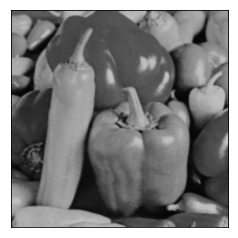

In [15]:
plt.imshow(img_predict, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Calculate the Mean Square Error (MSE) and Peak Signal-to-noise ratio (PSNR)

In [16]:
# Mean square error is defined as the mean of squares of the difference between original and predicted pixels
import math
mse = np.square(np.subtract(img, img_predict)).mean()
print("MEAN SQUARE ERROR is: ", round(mse, 2))

# PSNR is given as 20 * log(255) - 10 * log(MSE)
psnr = 20.0 * math.log10(255) - 10.0 * math.log10(mse)
print("PSNR is: ", round(psnr, 2))

MEAN SQUARE ERROR is:  45.41
PSNR is:  31.56


## Calculate PSNR for all the images in the dataset 

In [22]:
import os 

# os.listdir("standard_test_images/")
psnr_all = []

for file_name in os.listdir("standard_test_images/"):
    print(file_name)
    img = cv2.imread(os.path.join("standard_test_images/", file_name), 0)

    img = np.array(img)
    img_down_sampled = img[::2, ::2]

    X_features_diag = []
    X_features_str = []
    Y_data = []

    for i in range(1, 255):
        for j in range(1, 255):
            X_features_diag.append(get_neighbours_diag(i, j))
            X_features_str.append(get_neighbours_str(i, j))
            Y_data.append([img_down_sampled[i][j]])

    X_features_diag = np.array(X_features_diag, float)
    X_features_str = np.array(X_features_str, float)
    Y_data = np.array(Y_data, float)

    X_transpose = np.transpose(X_features_diag);
    para_diag = np.matmul(np.matmul(inv(np.matmul(X_transpose, X_features_diag)), X_transpose), Y_data)

    X_transpose = np.transpose(X_features_str);
    para_str = np.matmul(np.matmul(inv(np.matmul(X_transpose, X_features_str)), X_transpose), Y_data)

    img_predict = np.array(img)
    img_predict[1::2, :] = 0
    img_predict[:, 1::2] = 0
    img_predict = np.array(img_predict, float)

    for i in range(1, 510, 2):
        for j in range(1, 510, 2):
            img_predict[i, j] = predict_pixel_diag(i, j)

    for i in range(2, 510, 2):
        for j in range(1, 510, 2):
            img_predict[i, j] = predict_pixel_str(i, j)

    for i in range(1, 510, 2):
        for j in range(2, 509, 2):
            img_predict[i, j] = predict_pixel_str(i, j)

    i = 510
    for j in range(1, 510, 2):
        img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

    j = 510
    for i in range(1, 510, 2):
        img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

    i = 0
    for j in range(1, 510, 2):
        img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

    j = 0
    for i in range(1, 510, 2):
        img_predict[i ,j] = 4/3 * predict_pixel_str(i, j)

    img_predict[511, :] = img_predict[510, :]
    img_predict[:, 511] = img_predict[:, 510]

    mse = np.square(np.subtract(img, img_predict)).mean()

    psnr = 20.0 * math.log10(255) - 10.0 * math.log10(mse)
    print("PSNR is: ", round(psnr, 2), "\n")
    psnr_all.append(psnr)

print("THE AVERAGE VALUE OF THE PSNR IS (Considering the boundary pixels): ", sum(psnr_all)/float(len(psnr_all)))

jetplane.tif
PSNR is:  31.31 

woman_blonde.tif
PSNR is:  28.32 

house.tif
PSNR is:  36.26 

cameraman.tif
PSNR is:  32.83 

pirate.tif
PSNR is:  29.66 

woman_darkhair.tif
PSNR is:  36.7 

peppers_gray.tif
PSNR is:  31.56 

livingroom.tif
PSNR is:  28.24 

lena_gray_512.tif
PSNR is:  32.14 

walkbridge.tif
PSNR is:  26.06 

lake.tif
PSNR is:  29.15 

mandril_gray.tif
PSNR is:  29.2 

THE AVERAGE VALUE OF THE PSNR IS (Considering the boundary pixels):  30.95126272125158


In [21]:
import os 

# os.listdir("standard_test_images/")
psnr_all = []

for file_name in os.listdir("standard_test_images/"):
    print(file_name)
    img = cv2.imread(os.path.join("standard_test_images/", file_name), 0)

    img = np.array(img)
    img_down_sampled = img[::2, ::2]

    X_features_diag = []
    X_features_str = []
    Y_data = []

    for i in range(1, 255):
        for j in range(1, 255):
            X_features_diag.append(get_neighbours_diag(i, j))
            X_features_str.append(get_neighbours_str(i, j))
            Y_data.append([img_down_sampled[i][j]])

    X_features_diag = np.array(X_features_diag, float)
    X_features_str = np.array(X_features_str, float)
    Y_data = np.array(Y_data, float)

    X_transpose = np.transpose(X_features_diag);
    para_diag = np.matmul(np.matmul(inv(np.matmul(X_transpose, X_features_diag)), X_transpose), Y_data)

    X_transpose = np.transpose(X_features_str);
    para_str = np.matmul(np.matmul(inv(np.matmul(X_transpose, X_features_str)), X_transpose), Y_data)

    img_predict = np.array(img)
    img_predict[1::2, :] = 0
    img_predict[:, 1::2] = 0
    img_predict = np.array(img_predict, float)

    for i in range(1, 510, 2):
        for j in range(1, 510, 2):
            img_predict[i, j] = predict_pixel_diag(i, j)

    for i in range(2, 510, 2):
        for j in range(1, 510, 2):
            img_predict[i, j] = predict_pixel_str(i, j)

    for i in range(1, 510, 2):
        for j in range(2, 509, 2):
            img_predict[i, j] = predict_pixel_str(i, j)

    i = 510
    for j in range(1, 510, 2):
        img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

    j = 510
    for i in range(1, 510, 2):
        img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

    i = 0
    for j in range(1, 510, 2):
        img_predict[i, j] = 4/3 * predict_pixel_str(i, j)

    j = 0
    for i in range(1, 510, 2):
        img_predict[i ,j] = 4/3 * predict_pixel_str(i, j)

    img_predict[511, :] = img_predict[510, :]
    img_predict[:, 511] = img_predict[:, 510]

    mse = np.square(np.subtract(img[3:510, 3:510], img_predict[3:510, 3:510])).mean()

    psnr = 20.0 * math.log10(255) - 10.0 * math.log10(mse)
    print("PSNR is: ", round(psnr, 2), "\n")
    psnr_all.append(psnr)

print("THE AVERAGE VALUE OF THE PSNR IS (Without considering the boundary pixels): ", sum(psnr_all)/float(len(psnr_all)))

jetplane.tif
PSNR is:  32.12 

woman_blonde.tif
PSNR is:  29.4 

house.tif
PSNR is:  41.93 

cameraman.tif
PSNR is:  33.72 

pirate.tif
PSNR is:  29.81 

woman_darkhair.tif
PSNR is:  39.68 

peppers_gray.tif
PSNR is:  32.05 

livingroom.tif
PSNR is:  28.39 

lena_gray_512.tif
PSNR is:  32.58 

walkbridge.tif
PSNR is:  26.2 

lake.tif
PSNR is:  29.6 

mandril_gray.tif
PSNR is:  29.35 

THE AVERAGE VALUE OF THE PSNR IS (Without considering the boundary pixels):  32.069435531619284
